In [4]:
import numpy
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from costmap import CostMap

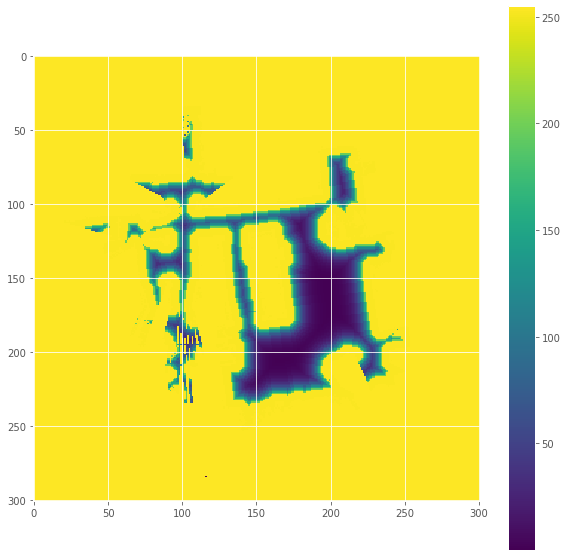

In [6]:
cm=CostMap("maps/test_map.pgm")

plt.figure(figsize=(10,10))
plt.imshow(cm.map_arr[100:401,100:401])
plt.colorbar()
plt.show()

## Costmap to Weighted Graph

In [7]:
class Graph:
    
    #Nodes
    def __init__(self):
        self.all_nodes=[]
    
    #Edges
    def neighbors(self,node):
        dirs = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]
        result = []
        for dir in dirs:
            neighbor = (node[0] + dir[0], node[1] + dir[1])
            if neighbor in self.all_nodes:
                result.append(neighbor)

        return result

class WeightedGraph(Graph):
   
    def __init__(self):
        super().__init__()
        self.weights = {}
    
    #Edges Costs
    def cost(self, from_node, to_node):
        return self.weights.get(to_node, 255)
    
all_nodes=[]
cell_costs={}
for x in range(cm.map_arr.shape[0]):
    for y in range(cm.map_arr.shape[1]):
        if cm.map_arr[x,y] < 255:
            all_nodes.append((x,y))
            cell_costs[(x,y)]=cm.map_arr[x,y]

graph=WeightedGraph()
graph.all_nodes=all_nodes
graph.weights=cell_costs

## Dijkstra Algorithm

In [10]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

In [14]:
%%time
def dijkstra_search(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal:
            break
        
        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost
                frontier.put(next, priority)
                came_from[next] = current
    
    return came_from, cost_so_far

res,_ = dijkstra_search(graph,(300,300), (200, 200));

CPU times: user 21.4 s, sys: 6.8 ms, total: 21.4 s
Wall time: 21.4 s


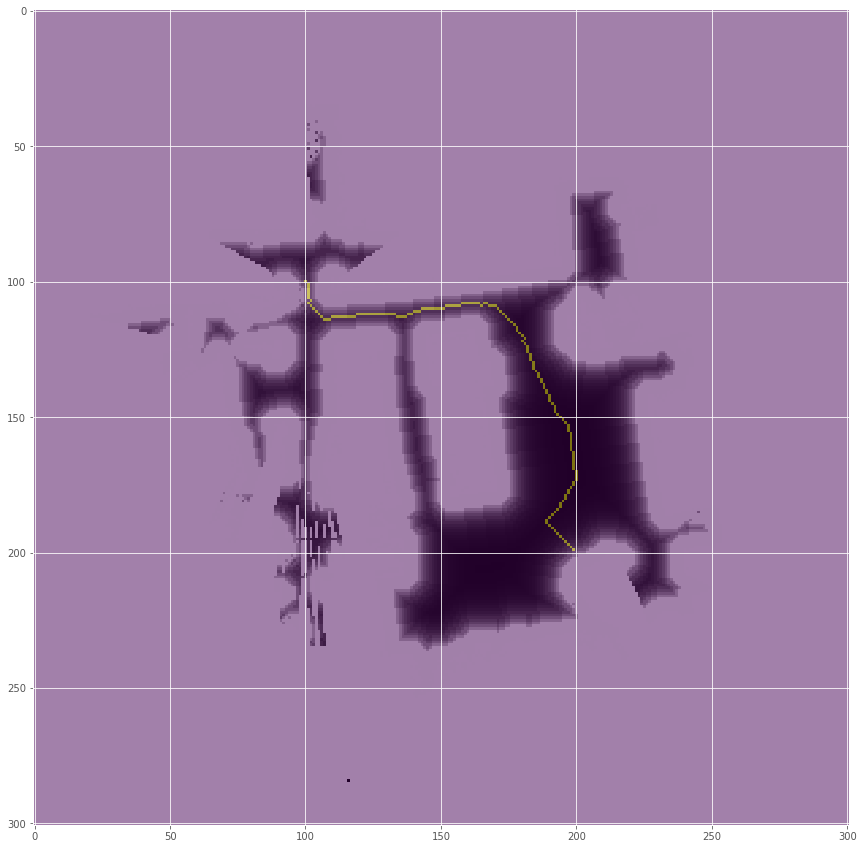

In [16]:
path=numpy.zeros_like(cm.map_arr)

curr=(200, 200)
while res[curr] is not None:
    path[curr[0],curr[1]]=1
    curr = res[curr]

plt.figure(figsize=(15,15))
plt.imshow(cm.map_arr[100:401,100:401], plt.cm.gray)
plt.imshow(path[100:401,100:401],alpha=.5)
#plt.colorbar()
plt.show()